In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader  
from skimage import io

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

# Experiment 3

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Soft Computing/Assignment 2/Dataset_2.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/Soft Computing/Assignment 2/Dataset_2.zip
   creating: Dataset_2/
  inflating: Dataset_2/t10k-images-idx3-ubyte  
  inflating: Dataset_2/t10k-labels-idx1-ubyte  
  inflating: Dataset_2/train-images-idx3-ubyte  
  inflating: Dataset_2/train-labels-idx1-ubyte  
  inflating: Dataset_2/verification_test.csv  
  inflating: Dataset_2/verification_train.csv  


In [ ]:
train_csv2  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Soft Computing/Assignment 2/verification_train.csv')
test_csv2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Soft Computing/Assignment 2/verification_test.csv')

In [ ]:
import numpy as np
class second_Dataset(Dataset):
    """User defined class to build a datset using Pytorch class Dataset."""
    
    def __init__(self, data, transform = None):
        """Method to initilaize variables.""" 
        self.data_MNIST = list(data.values)
        self.transform = transform
        
        label = []
        image = []
        
        for i in self.data_MNIST:
             # first column is of labels.
            label.append(i[0])
            image.append(i[1:])
        self.labels = np.asarray(label)
        self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')

    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]
        
        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)

In [ ]:
train_set = second_Dataset(train_csv2, transform=transforms.Compose([transforms.ToTensor()]))
test_set = second_Dataset(test_csv2, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(train_set, batch_size=100)

For experiment 1

In [ ]:
# Hyperparameters

batch_size = 20
num_iters = 20000
input_dim = 28*28 # num_features = 784
num_hidden = 200 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)  


In [ ]:
print(len(train_set))
print(len(test_set))

60000
10000


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_3(out)
        
        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_5(out)
        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_6(out)
     
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
iteration_loss= []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.45351308584213257. Accuracy: 78.21
Iteration: 1000. Loss: 0.43806368112564087. Accuracy: 78.94
Iteration: 1500. Loss: 0.5933514833450317. Accuracy: 83.11
Iteration: 2000. Loss: 0.44516754150390625. Accuracy: 83.55
Iteration: 2500. Loss: 0.5502718091011047. Accuracy: 83.21
Iteration: 3000. Loss: 0.39229685068130493. Accuracy: 83.03
Iteration: 3500. Loss: 0.3872542381286621. Accuracy: 85.09
Iteration: 4000. Loss: 0.07627919316291809. Accuracy: 84.95
Iteration: 4500. Loss: 0.31914693117141724. Accuracy: 84.89
Iteration: 5000. Loss: 0.5082411170005798. Accuracy: 86.4
Iteration: 5500. Loss: 1.119370698928833. Accuracy: 85.25
Iteration: 6000. Loss: 0.11456097662448883. Accuracy: 86.56
Iteration: 6500. Loss: 0.386513888835907. Accuracy: 86.57
Iteration: 7000. Loss: 0.1942993700504303. Accuracy: 86.65
Iteration: 7500. Loss: 0.4924263060092926. Accuracy: 86.05
Iteration: 8000. Loss: 0.8463047742843628. Accuracy: 87.03
Iteration: 8500. Loss: 0.4972142279148102. Accuracy: 

[0.45351308584213257, 0.43806368112564087, 0.5933514833450317, 0.44516754150390625, 0.5502718091011047, 0.39229685068130493, 0.3872542381286621, 0.07627919316291809, 0.31914693117141724, 0.5082411170005798, 1.119370698928833, 0.11456097662448883, 0.386513888835907, 0.1942993700504303, 0.4924263060092926, 0.8463047742843628, 0.4972142279148102, 0.3761133849620819, 0.21196623146533966, 0.3028075098991394, 0.3701668083667755, 0.22082026302814484, 0.45007389783859253, 0.11477893590927124, 0.2712339758872986, 0.47871190309524536, 0.0787273645401001, 0.7117013335227966, 0.472402423620224, 0.5075234770774841, 0.255046010017395, 0.3022024631500244, 0.11524438858032227, 0.36348965764045715, 0.18099768459796906, 0.2115722894668579]


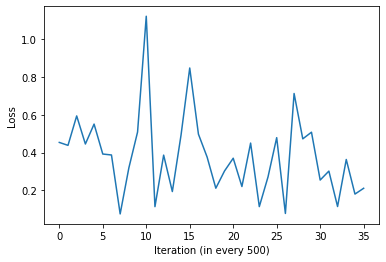

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
save_model = True
root_path= '/content/drive/MyDrive/Colab Notebooks'
if save_model is True:
    # Saves only parameters
    # weights & biases
    torch.save(model.state_dict(), 'exp3_1.pkl') 

In [ ]:
# Load Model
load_model = True

if load_model is True:
    model.load_state_dict(torch.load('exp3_1.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


For experiment 2

In [ ]:
# Hyperparameters

batch_size = 128
num_iters = 80000
input_dim = 28*28 # num_features = 784
num_hidden = 400 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_3(out)
     
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


Iteration: 500. Loss: 0.4738587439060211. Accuracy: 83.08
Iteration: 1000. Loss: 0.47023510932922363. Accuracy: 86.35
Iteration: 1500. Loss: 0.3189685642719269. Accuracy: 86.53
Iteration: 2000. Loss: 0.27260932326316833. Accuracy: 85.27
Iteration: 2500. Loss: 0.3673635423183441. Accuracy: 86.67
Iteration: 3000. Loss: 0.32289934158325195. Accuracy: 85.57
Iteration: 3500. Loss: 0.2411613166332245. Accuracy: 87.66
Iteration: 4000. Loss: 0.21831916272640228. Accuracy: 88.41
Iteration: 4500. Loss: 0.27037084102630615. Accuracy: 88.48
Iteration: 5000. Loss: 0.20464591681957245. Accuracy: 88.54
Iteration: 5500. Loss: 0.22762355208396912. Accuracy: 87.98
Iteration: 6000. Loss: 0.3160369396209717. Accuracy: 87.82
Iteration: 6500. Loss: 0.19084575772285461. Accuracy: 88.59
Iteration: 7000. Loss: 0.27513548731803894. Accuracy: 88.92
Iteration: 7500. Loss: 0.2468205690383911. Accuracy: 88.79
Iteration: 8000. Loss: 0.25499898195266724. Accuracy: 88.9
Iteration: 8500. Loss: 0.15696905553340912. Accu

[0.4738587439060211, 0.47023510932922363, 0.3189685642719269, 0.27260932326316833, 0.3673635423183441, 0.32289934158325195, 0.2411613166332245, 0.21831916272640228, 0.27037084102630615, 0.20464591681957245, 0.22762355208396912, 0.3160369396209717, 0.19084575772285461, 0.27513548731803894, 0.2468205690383911, 0.25499898195266724, 0.15696905553340912, 0.21567602455615997, 0.18217238783836365, 0.28525471687316895, 0.26999881863594055, 0.15512976050376892, 0.18894942104816437, 0.12030066549777985, 0.15930095314979553, 0.12433452904224396, 0.1438577026128769, 0.14395157992839813, 0.13300523161888123, 0.09983689337968826, 0.06287188827991486, 0.08262217044830322, 0.11179260164499283, 0.0754476860165596, 0.056864652782678604, 0.07365954667329788, 0.09390006959438324, 0.12591631710529327, 0.14185398817062378, 0.11033657193183899, 0.10613397508859634, 0.1729382872581482, 0.10421179234981537, 0.11274240911006927, 0.09235932677984238, 0.08928076922893524, 0.13837268948554993, 0.07625724375247955,

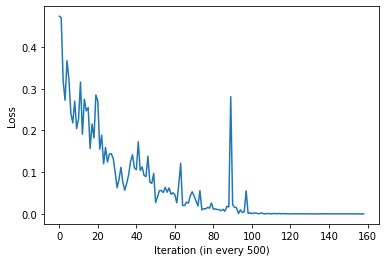

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
save_model = True
root_path= '/content/drive/MyDrive/Colab Notebooks'
if save_model is True:
    # Saves only parameters
    # weights & biases
    torch.save(model.state_dict(), 'exp3_2.pkl') 

In [ ]:
# Load Model
load_model = True

if load_model is True:
    model.load_state_dict(torch.load('exp3_2.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded
